### Gaussian Random Path

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from util import soft_squash,kernel_se,kernel_levse
from grp import GaussianRandomPathClass
print ("Done.")

Done.


### Soft-squashing

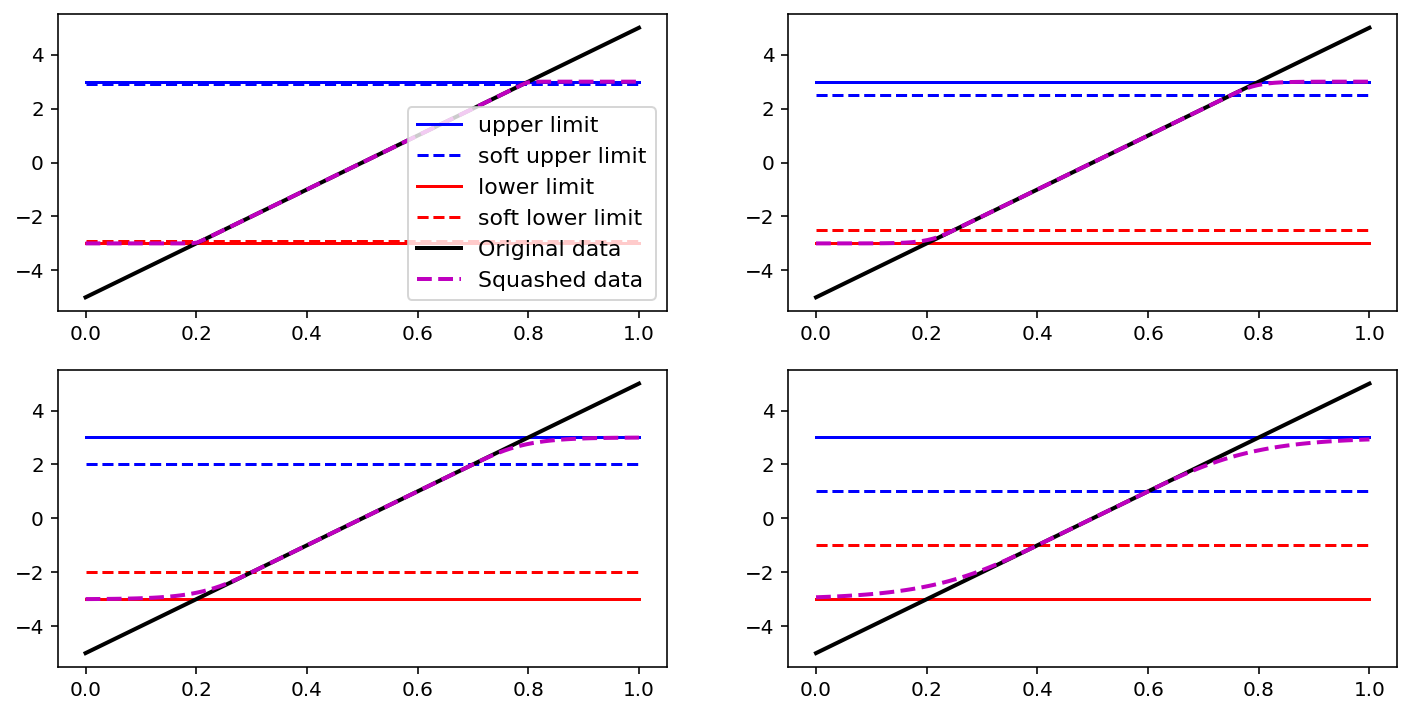

In [2]:
t = np.linspace(0,1,100).reshape((-1,1))
x = np.linspace(-5,+5,100).reshape((-1,1))
plt.figure(figsize=(12,6))
margins = [0.1,0.5,1.0,2.0]
for m_idx,margin in enumerate(margins):
    x_min,x_max,margin = -3,3,margin
    x_squash = soft_squash(x,x_min=x_min,x_max=x_max,margin=margin)
    plt.subplot(2,2,m_idx+1)
    plt.plot(t,x_max*np.ones_like(t),color='b',label='upper limit')
    plt.plot(t,(x_max-margin)*np.ones_like(t),'--',color='b',label='soft upper limit')
    plt.plot(t,x_min*np.ones_like(t),'-',color='r',label='lower limit')
    plt.plot(t,(x_min+margin)*np.ones_like(t),'--',color='r',label='soft lower limit')
    plt.plot(t,x,'-',color='k',lw=2,label='Original data')
    plt.plot(t,x_squash,'--',color='m',lw=2,label='Squashed data')
    if m_idx == 0: plt.legend(fontsize=11,loc='lower right')
plt.show()

### Original GRP

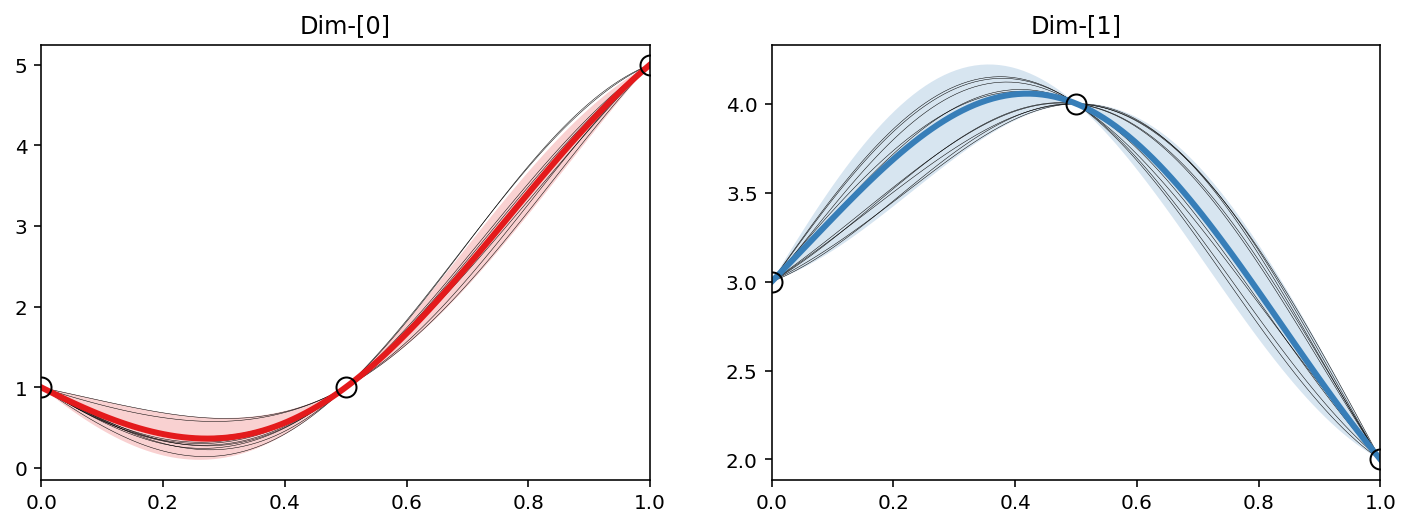

In [3]:
G = GaussianRandomPathClass(name='GRP',kernel=kernel_se)
G.set_data(t_anchor    = np.linspace(start=0.0,stop=1.0,num=3).reshape((-1,1)),
           x_anchor    = np.array([[1,1,5],[3,4,2]]).T,
           t_test      = np.linspace(start=0.0,stop=1.0,num=100).reshape((-1,1)),
           hyp_mean    = {'g':1.0,'l':0.5,'w':1e-6},
           hyp_var     = {'g':1.0,'l':0.5,'w':1e-6},
           APPLY_EPSRU = False
          )
G.plot(n_sample=10,figsize=(12,4),subplot_rc=(1,2),tfs=12)

### Leveraged GRP

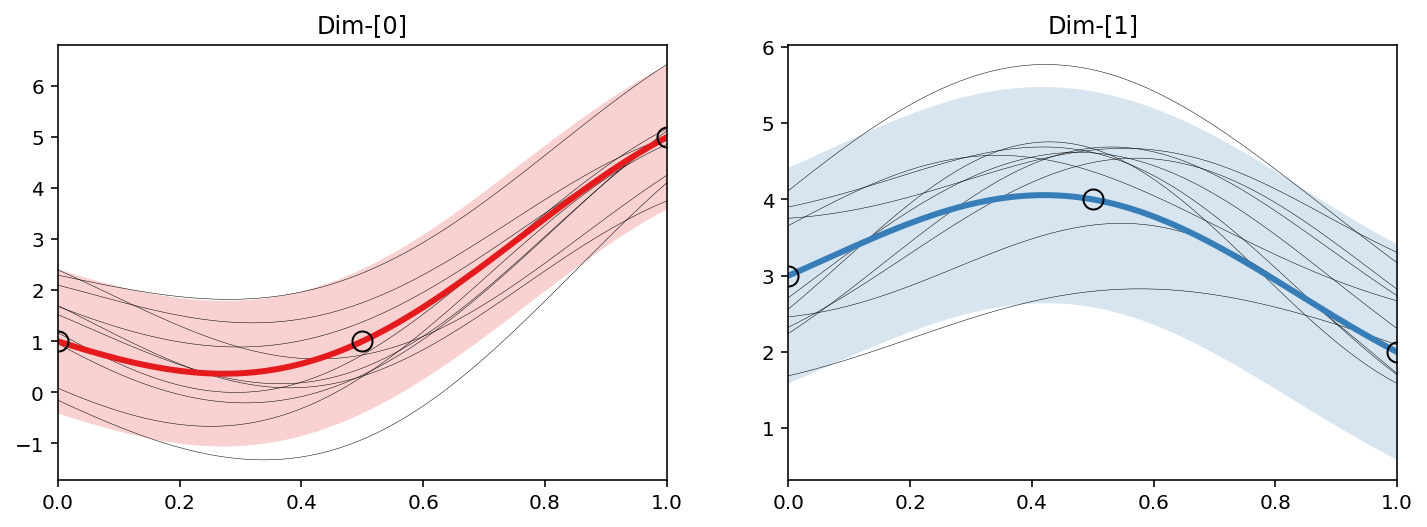

In [4]:
G = GaussianRandomPathClass(name='LGRP',kernel=kernel_levse)
G.set_data(t_anchor    = np.linspace(start=0.0,stop=1.0,num=3).reshape((-1,1)),
           x_anchor    = np.array([[1,1,5],[3,4,2]]).T,
           l_anchor    = np.array([[0.5,0.5,0.5]]).T,
           t_test      = np.linspace(start=0.0,stop=1.0,num=100).reshape((-1,1)),
           l_test      = np.ones((100,1)),
           hyp_mean    = {'g':1.0,'l':0.5,'w':1e-6},
           hyp_var     = {'g':1.0,'l':0.5,'w':1e-6},
           APPLY_EPSRU = False
          )
G.plot(n_sample=10,figsize=(12,4),subplot_rc=(1,2),tfs=12)

### Open-ended GRP

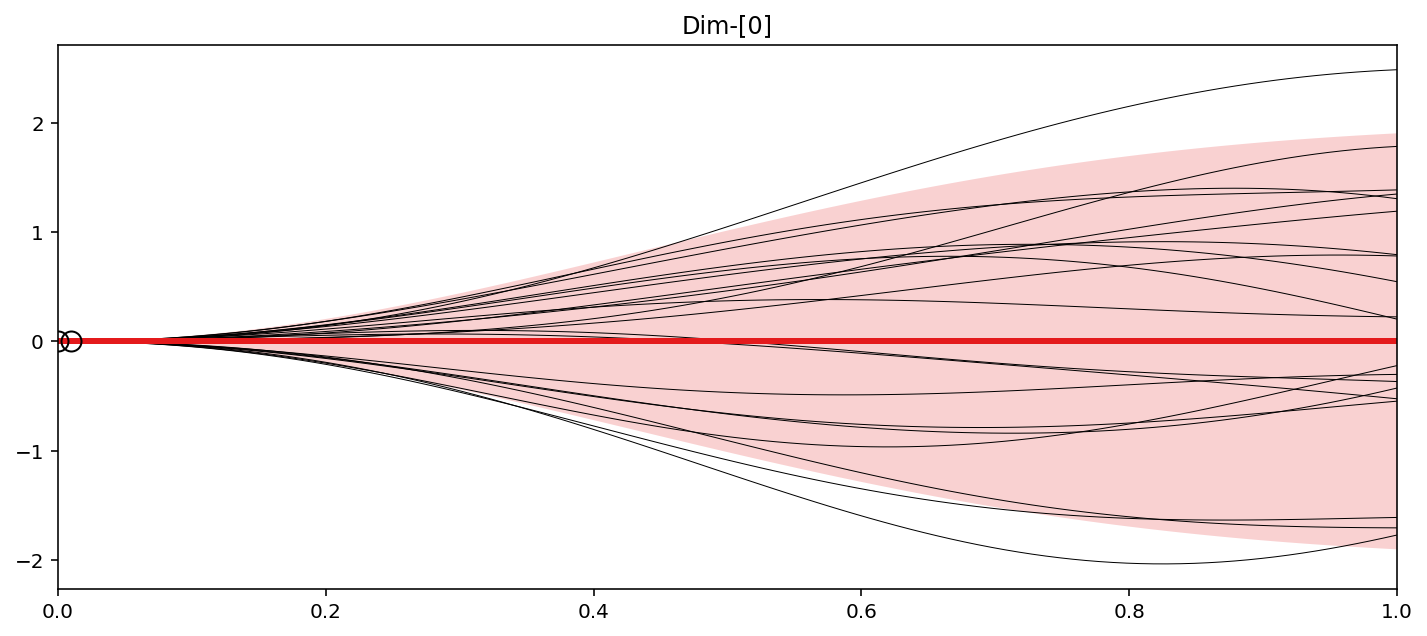

In [5]:
G = GaussianRandomPathClass(name='LGRP',kernel=kernel_levse)
G.set_data(t_anchor     = np.linspace(start=0.0,stop=0.01,num=2).reshape((-1,1)),
           x_anchor     = np.array([[0,0]]).T,
           l_anchor     = np.array([[1,1]]).T,
           t_test       = np.linspace(start=0.0,stop=1.0,num=100).reshape((-1,1)),
           l_test       = np.ones((100,1)),
           hyp_mean     = {'g':1,'l':1/5,'w':1e-8},
           hyp_var      = {'g':1,'l':1/2,'w':1e-8},
           w_chol       = 1e-10
          )
G.plot(n_sample=20,figsize=(12,5),lw_sample=1/2,tfs=12)

### Interpolate using GRP

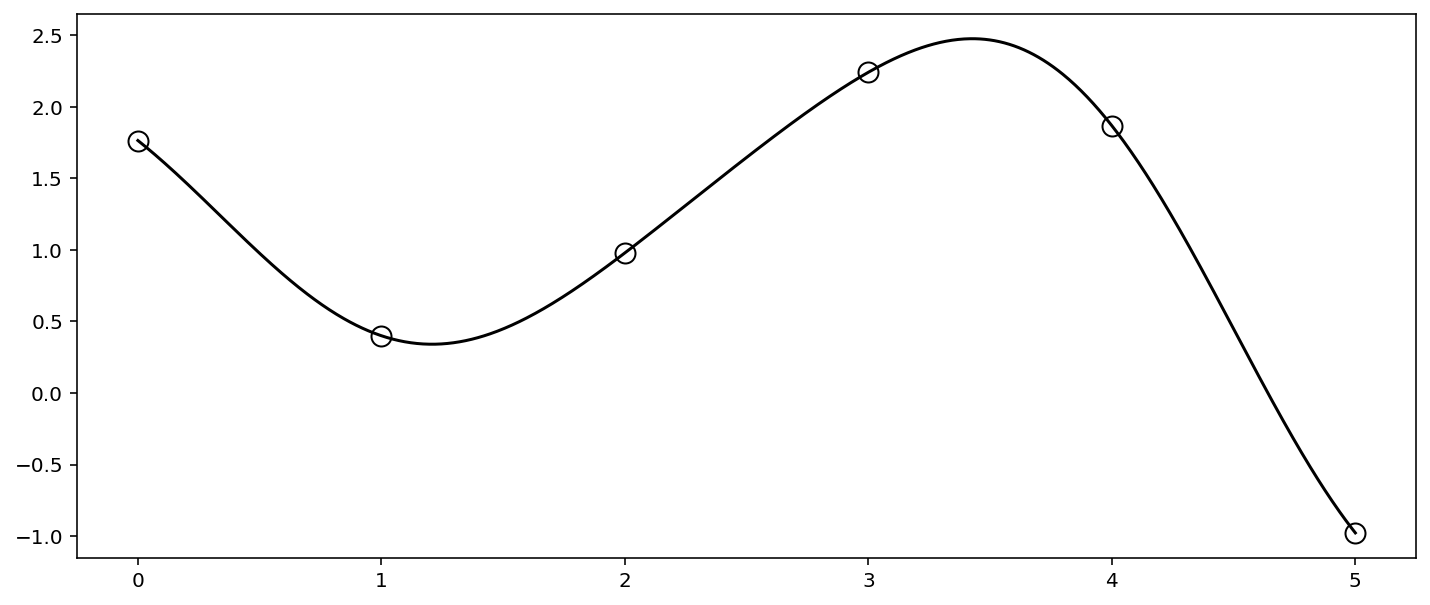

In [6]:
np.random.seed(0)
G = GaussianRandomPathClass(name='LGRP',kernel=kernel_levse)
t_anchor = np.linspace(start=0.0,stop=5.0,num=6).reshape((-1,1))
x_anchor = np.random.randn(6).reshape((-1,1))
t_test   = np.linspace(start=0.0,stop=5.0,num=1000).reshape((-1,1))
x_test   = G.interpolate(t_anchor=t_anchor,x_anchor=x_anchor,t_test=t_test,hyp={'g':1,'l':1,'w':1e-8},
                         APPLY_EPSRU=False,t_eps=0.05)
# Plot
plt.figure(figsize=(12,5))
plt.plot(t_anchor,x_anchor,'o',color='k',mfc='none',ms=10,lw=2)
plt.plot(t_test,x_test,'-',color='k')
plt.show()

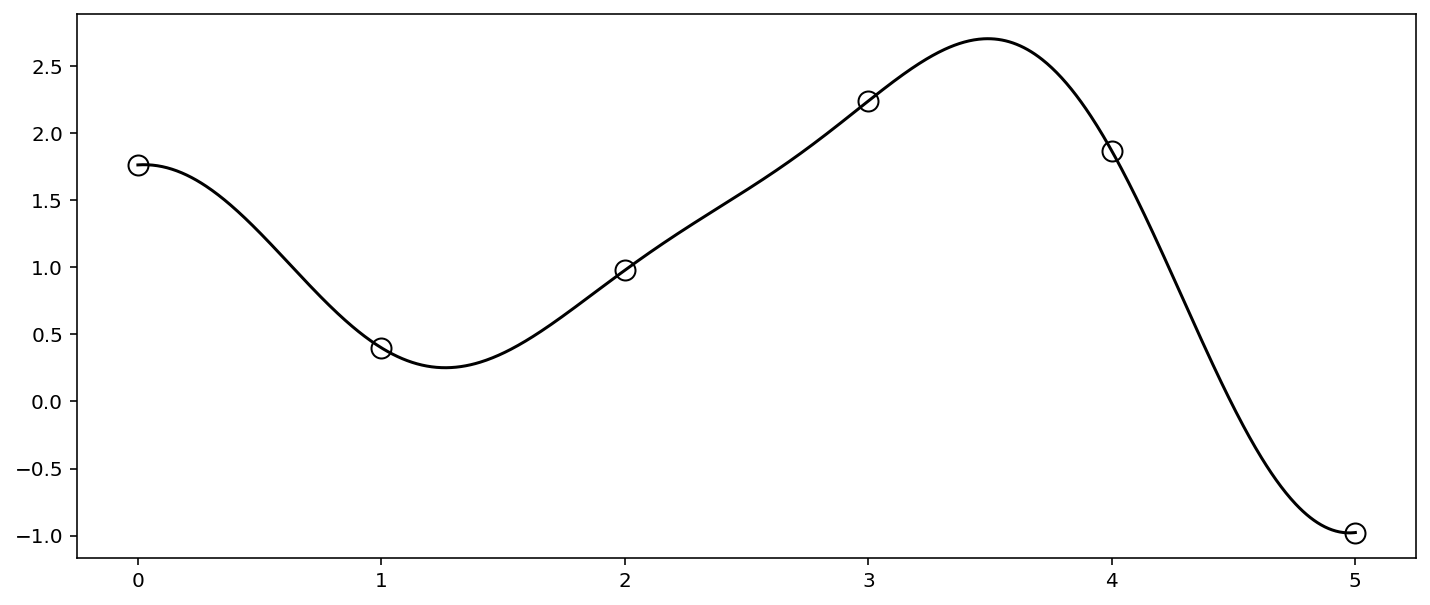

In [7]:
np.random.seed(0)
G = GaussianRandomPathClass(name='LGRP',kernel=kernel_levse)
t_anchor = np.linspace(start=0.0,stop=5.0,num=6).reshape((-1,1))
x_anchor = np.random.randn(6).reshape((-1,1))
t_test   = np.linspace(start=0.0,stop=5.0,num=1000).reshape((-1,1))
x_test   = G.interpolate(t_anchor=t_anchor,x_anchor=x_anchor,t_test=t_test,hyp={'g':1,'l':1,'w':1e-8},
                         APPLY_EPSRU=True,t_eps=0.05,x_diff_start=np.zeros((1,1)),x_diff_end=np.zeros((1,1)))
# Plot
plt.figure(figsize=(12,5))
plt.plot(t_anchor,x_anchor,'o',color='k',mfc='none',ms=10,lw=2)
plt.plot(t_test,x_test,'-',color='k')
plt.show()